From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



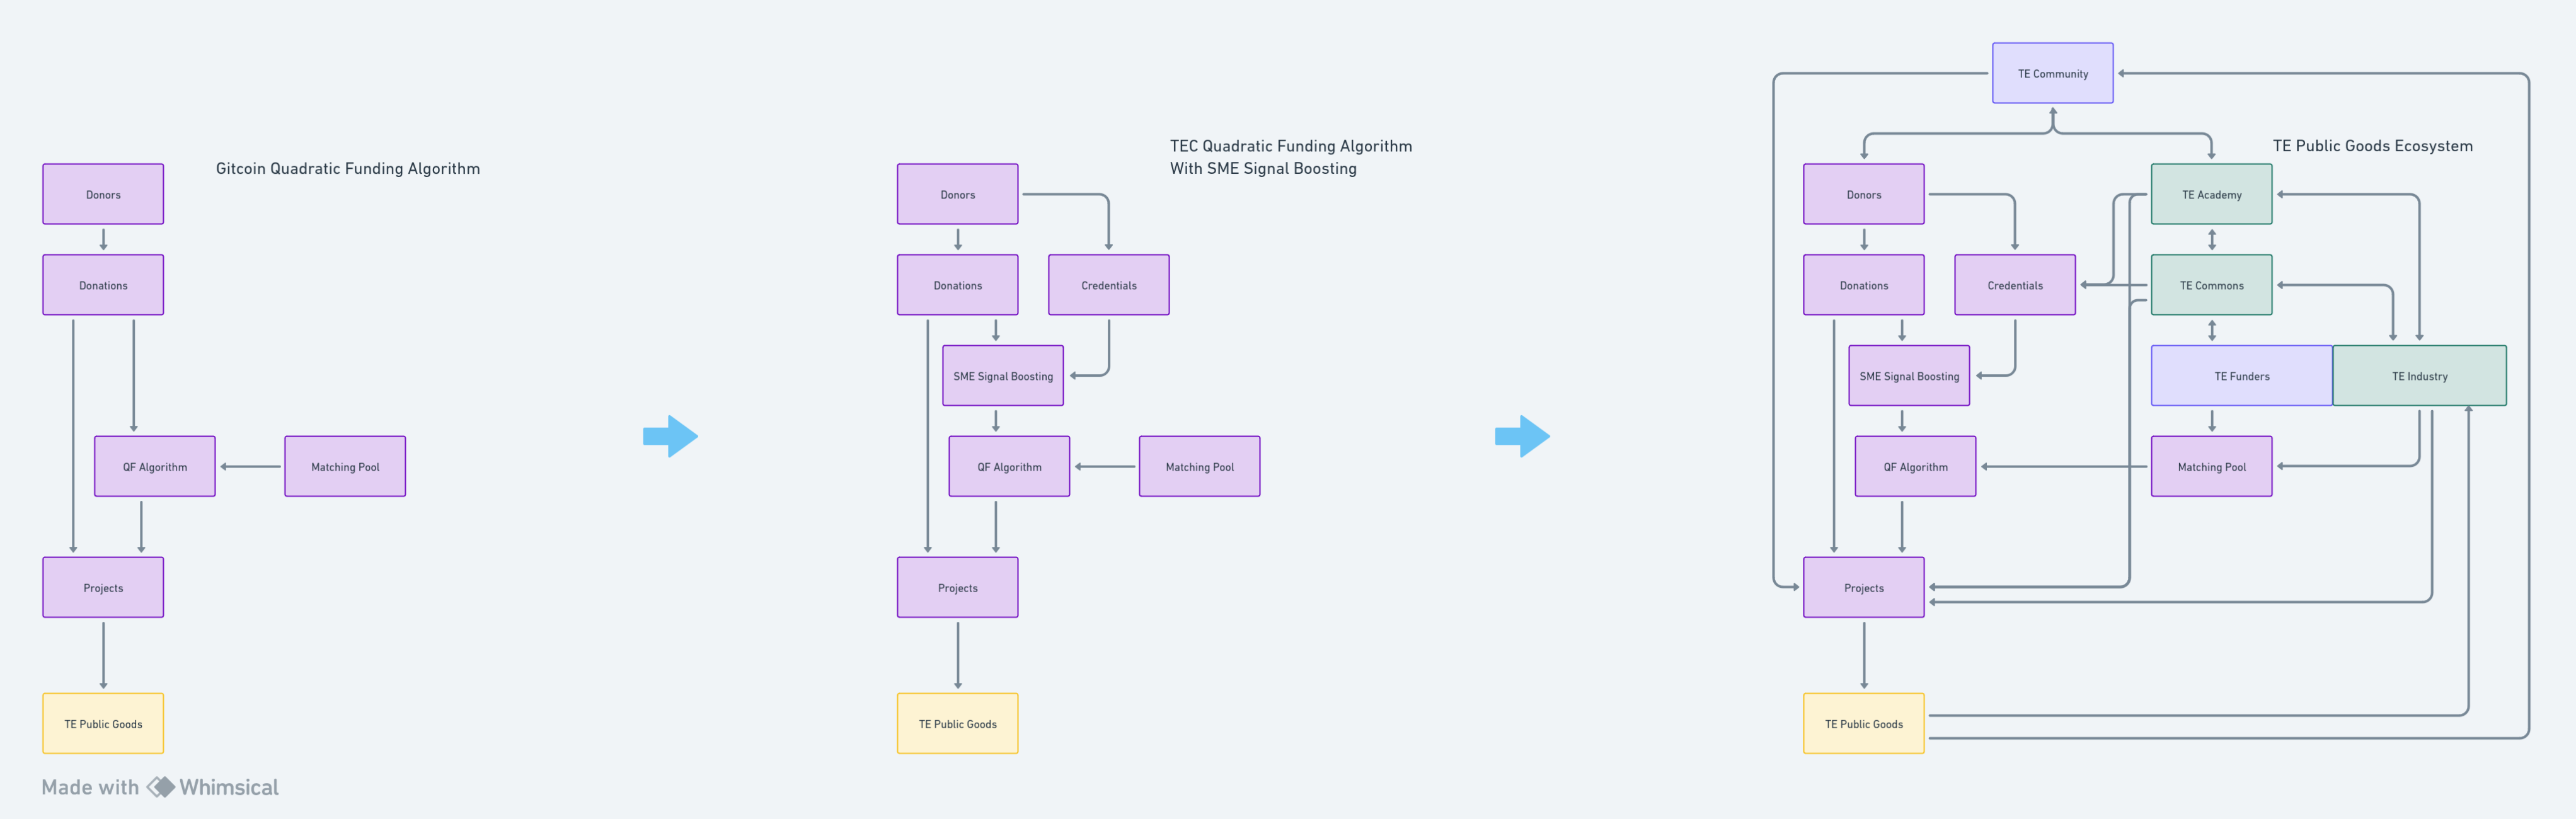![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

## A Flexible Design for Funding Public Goods

Bhuterin, Hitzig, Weyl on A Flexible Design for Funding Public Goods. 

https://arxiv.org/pdf/1809.06421.pdf

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

### 3.0 Model

This is the foundational setup in the paper.

In [87]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = list(range(N))

# Community is a random subset of the society. The community size is from 25 up to size of the society.
community = np.random.choice(a=list(society), size=np.random.randint(25, len(society)), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 20 up to size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(20, len(community)), replace=True, p=None)))

In [88]:
community

array([ 2, 12, 18, 22,  7,  0,  1,  3, 14, 13, 15, 16, 10, 21, 27,  9, 11,
       26, 19, 23, 28, 24,  5, 17, 29,  8, 20,  4, 25])

In [3]:
public_goods

[(0, 3),
 (1, 21),
 (2, 15),
 (3, 17),
 (4, 18),
 (5, 16),
 (6, 27),
 (7, 0),
 (8, 20),
 (9, 2),
 (10, 20),
 (11, 3),
 (12, 6),
 (13, 18),
 (14, 11),
 (15, 26),
 (16, 9),
 (17, 23),
 (18, 7),
 (19, 16),
 (20, 12),
 (21, 17),
 (22, 19),
 (23, 0),
 (24, 23),
 (25, 29),
 (26, 18),
 (27, 29)]

In [4]:
len(society)

30

In [5]:
len(community)

29

In [6]:
len(public_goods)

28

### 3.1 Individual Preferences and Actions

The paper calls for Concave, Smooth, Increasing preferences towards the funding of public goods.

The concave value generator has the following properties:
1. f0 = f(0) is in [0,1]
2. f1 = f(1) is in [f0,1]
3. f(x) = 1 - e**(-s*x)
4. The negative exponential function provides a smooth, concave, increasing function from f0 to f1 with a parameterized steepness.

In [7]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The class dynamically clips f1 to satisfy property 2. Such as in the following example:

In [8]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00955', steepness=5)

Here we propose parameter generators for sampling concave functions

In [9]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_parameters_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

This method generates random parameters given the distributions described for f0, f1, and steepness above. 
* f0 is a normal distribution at (0.1,0.3), clipped at (0,1)
* f0 is a normal distribution at (0.5,0.4), clipped at (0,1)
* steepness is a uniform distribution at (1,20)

In [10]:
concave_function_parameters_generator()

{'f0': 0.35165683977051787, 'f1': 0, 'steepness': 2.103668425232917}

In [11]:
value_functions = [ConcaveFunctionGenerator(**concave_function_parameters_generator()) for p_i in range(len(public_goods)*len(society))]

Here we can see all of the preferences of the citizens. These are the value functions V_p_i(F_p). There is one preference function for each V_p_i in {public_goods}X{citizens}. Cardinality is len(public_goods)*len(citizens).

In [12]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i_slider = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i_slider, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i_slider))

Row
    [0] IntSlider(end=839, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

Create a Dataframe! These are citizen preferences by funding amounts for public goods. Take Funding Amount as the Index by applying a transpose. 

In [13]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions])
df_value_functions = df_value_functions.T
df_value_functions.shape

(400, 840)

Make Funding the Index from 0 to 100

In [14]:
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

Label the Columns by {public_goods}X{Citizens}.

In [15]:
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"


Number of columns is len(public_goods)*len(society).

In [16]:
df_value_functions

value_p_i,"((0, 3), 0)","((0, 3), 1)","((0, 3), 2)","((0, 3), 3)","((0, 3), 4)","((0, 3), 5)","((0, 3), 6)","((0, 3), 7)","((0, 3), 8)","((0, 3), 9)",...,"((27, 29), 20)","((27, 29), 21)","((27, 29), 22)","((27, 29), 23)","((27, 29), 24)","((27, 29), 25)","((27, 29), 26)","((27, 29), 27)","((27, 29), 28)","((27, 29), 29)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.458090,0.000000,0.024206,0.000000,0.535063,0.192615,0.542011,0.013707,0.621157,0.221195,...,0.008912,0.068476,0.150644,0.114622,0.000000,0.000000,0.0,0.000000,0.384056,0.000000
0.002506,0.471698,0.010050,0.031167,0.009050,0.535063,0.193844,0.542011,0.027101,0.628049,0.225738,...,0.008912,0.076667,0.186694,0.118011,0.006375,0.015100,0.0,0.009786,0.384056,0.021111
0.005013,0.484964,0.019943,0.037919,0.017795,0.535063,0.195060,0.542011,0.040187,0.634776,0.230088,...,0.008912,0.084769,0.221215,0.121391,0.012683,0.029506,0.0,0.019115,0.384056,0.041746
0.007519,0.497897,0.029683,0.044470,0.026246,0.535063,0.196264,0.542011,0.052970,0.641341,0.234252,...,0.008912,0.092783,0.254271,0.124763,0.018924,0.043250,0.0,0.028006,0.384056,0.061915
0.010025,0.510506,0.039270,0.050825,0.034412,0.535063,0.197455,0.542011,0.065459,0.647748,0.238239,...,0.008912,0.100710,0.285923,0.128126,0.025099,0.056362,0.0,0.036481,0.384056,0.081628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.999998,0.643875,0.257281,0.268897,0.535063,0.312745,0.542011,0.593872,0.907896,0.327861,...,0.008912,0.811987,1.000000,0.962193,0.594576,0.328669,0.0,0.209013,0.384056,0.935185
0.992481,0.999998,0.643895,0.257281,0.268897,0.535063,0.312768,0.542011,0.593873,0.907897,0.327861,...,0.008912,0.812096,1.000000,0.963441,0.594673,0.328669,0.0,0.209013,0.384056,0.935187
0.994987,0.999999,0.643915,0.257281,0.268898,0.535063,0.312791,0.542011,0.593874,0.907897,0.327861,...,0.008912,0.812204,1.000000,0.964686,0.594768,0.328669,0.0,0.209013,0.384056,0.935190


Display Citizen Preferences for Funding.

In [17]:
# df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

Mean preferences for funding public goods.

In [18]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

Moving on..

In [19]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

Melting preferences to get groupby on public good or on citizen.

In [20]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

,value_p_i,value,public_good,citizen
funding,,,,
0.000000,"((0, 3), 0)",0.458090,"(0, 3)",0
0.002506,"((0, 3), 0)",0.471698,"(0, 3)",0
0.005013,"((0, 3), 0)",0.484964,"(0, 3)",0
0.007519,"((0, 3), 0)",0.497897,"(0, 3)",0
0.010025,"((0, 3), 0)",0.510506,"(0, 3)",0
...,...,...,...,...
0.989975,"((27, 29), 29)",0.935185,"(27, 29)",29
0.992481,"((27, 29), 29)",0.935187,"(27, 29)",29
0.994987,"((27, 29), 29)",0.935190,"(27, 29)",29


Groupby funding and public good to get mean funding preferences per public good.

In [21]:
mean_utility_df = df_value_functions_melted.groupby(['funding', 'public_good'])[['value']].mean().reset_index()

Display mean value function per public good.

In [22]:
mean_utility_df.hvplot.line(y='value', by='public_good', alpha=0.8, line_width=4, x='funding', title='Mean Value to Society per Public Good Given Funding')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Display mean value function per citizen.

In [23]:
mean_utility_df2 = df_value_functions_melted.groupby(['funding', 'citizen'])[['value']].mean().reset_index()

In [24]:
mean_utility_df2.hvplot.line(y='value', by='citizen', alpha=0.8, line_width=4, x='funding', title='Mean Public Good Preference Value Function per Citizen')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Each citizen i can make contributions to the funding of each public good p out of their resources c_p_i. The total utility then of citizen i is: [sum(V_p_i(F_p))  - c_p_i - t_i for all p in public_goods]

To calculate the above, we need F_p which is a vector of how much funding is achieved by each public good. We can sample a distribution of funding ammounts.

### 3.1 Side Quest: Funding Generator

### Funding Generator Per Public Good.

In [25]:
public_goods_funding_model = {'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': len(public_goods),
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [26]:
import param
import numpy as np
import pandas as pd
import panel as pn
import hvplot.pandas

class PublicGoodsFundingDistributionGenerator(param.Parameterized):
    distribution_type = param.ObjectSelector(default="normal", objects=["normal", "constant", "uniform", "exponential"])
    mean = param.Number(default=0.5, bounds=(0, 1))
    n = param.Integer(default=100, bounds=(1, 1000))
    
    # Additional parameters for specific distributions
    std_dev = param.Number(default=0.1, bounds=(0, 0.5))  # for normal distribution
    constant_value = param.Number(default=0.5, bounds=(0, 1))  # for constant distribution
    lambda_param = param.Number(default=1.0, bounds=(0.1, 5))  # for exponential distribution
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def generate_distribution(self):
        if self.distribution_type == "normal":
            distribution = np.clip(np.random.normal(self.mean, self.std_dev, self.n), 0, 1)
        elif self.distribution_type == "constant":
            distribution = np.full(self.n, self.constant_value)
        elif self.distribution_type == "uniform":
            distribution = np.random.uniform(0, 1, self.n)
        elif self.distribution_type == "exponential":
            distribution = np.clip(np.random.exponential(1/self.lambda_param, self.n), 0, 1)
        return distribution #/ distribution.sum()
        
    
    @param.depends('distribution_type', 'mean', 'n', 'std_dev', 'constant_value', 'lambda_param')
    def view(self):
        data = self.generate_distribution()
        df = pd.DataFrame({'Value': data})
        return df.hvplot.hist('Value', bins=30, xlim=(0, 1), title='Public Goods Funding Histogram')

# Create an instance
dist_gen = PublicGoodsFundingDistributionGenerator(**public_goods_funding_model)

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='PublicGoodsFundingDistrib...)
        [0] StaticText(value='<b>PublicGoodsFundingDist...)
        [1] Select(name='Distribution type', options=OrderedDict([('normal', ...]), value='exponential')
        [2] FloatSlider(name='Mean', value=0.2)
        [3] IntSlider(end=1000, name='N', start=1, value=28)
        [4] FloatSlider(end=0.5, name='Std dev', value=0.2)
        [5] FloatSlider(name='Constant value', value=0.5)
        [6] FloatSlider(end=5, name='Lambda param', start=0.1, value=2.8000000000000003)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

In [27]:
dist_gen.param.values()

{'constant_value': 0.5,
 'distribution_type': 'exponential',
 'lambda_param': 2.8000000000000003,
 'mean': 0.2,
 'n': 28,
 'name': 'PublicGoodsFundingDistributionGenerator53483',
 'std_dev': 0.2}

In [28]:
public_goods_funding_distribution = pd.Series(dist_gen.generate_distribution(), name='Public Goods Funding Distribution')
public_goods_funding_distribution = public_goods_funding_distribution / public_goods_funding_distribution.sum()

In [29]:
public_goods_funding_distribution

0     0.024322
1     0.016947
2     0.081844
3     0.018194
4     0.034629
5     0.016798
6     0.000884
7     0.061247
8     0.013801
9     0.046191
10    0.002097
11    0.002074
12    0.027937
13    0.057646
14    0.031352
15    0.008730
16    0.081844
17    0.046488
18    0.009730
19    0.035576
20    0.010851
21    0.058866
22    0.046546
23    0.076583
24    0.038141
25    0.081844
26    0.026974
27    0.041863
Name: Public Goods Funding Distribution, dtype: float64

In [30]:
public_goods_funding_distribution.shape

(28,)

In [31]:
public_goods_funding_distribution.sum()

1.0

### Public Goods Funding Generator Simplified - Pareto

In [32]:
import numpy as np

def generate_pareto(n, alpha=2):
    # Generate Pareto samples
    samples = np.random.pareto(alpha, n)
    
    # Normalize to make them sum to 1
    normalized_samples = samples / samples.sum()
    
    # Clip values to [0,1]
    clipped_samples = np.clip(normalized_samples, 0, 1)
    
    # Adjust to ensure they still sum to 1 after clipping
    clipped_samples /= clipped_samples.sum()
    
    return clipped_samples

n = len(public_goods)
pareto_samples = generate_pareto(n)


In [33]:
pd.DataFrame(pareto_samples).sort_values(0,ascending=False).reset_index(drop=True).hvplot(title='Public Goods Funding Distribution', xlabel='Public Good', ylabel='Funding')

:Curve   [index]   (0)

In [34]:
public_goods_funding_distribution = pd.Series(pareto_samples, name='Public Goods Funding Distribution')
public_goods_funding_distribution

0     0.033269
1     0.016807
2     0.015996
3     0.086402
4     0.004523
5     0.005877
6     0.025923
7     0.000039
8     0.000044
9     0.000320
10    0.047097
11    0.015381
12    0.039339
13    0.012214
14    0.021811
15    0.020977
16    0.055542
17    0.049334
18    0.121150
19    0.190329
20    0.030931
21    0.006373
22    0.005274
23    0.136971
24    0.023180
25    0.029434
26    0.005314
27    0.000149
Name: Public Goods Funding Distribution, dtype: float64

In [35]:
public_goods_funding_distribution.shape

(28,)

In [36]:
public_goods_funding_distribution.sum()

1.0

### Citizen Funding Model

Given a citizen i, this model selects a k public goods to donate to. The number of public goods to donate to is sampled from a beta decay centered at 8 in range [1,len(public_goods)].

Once k is sampled, a normal distribution of size k is sampled, and padded with 0s to be of size n. Then all is shuffled to distribute 0s randomly.

In [37]:
import numpy as np
from icecream import ic
ic.configureOutput(prefix='ic|',outputFunction=print)

n = len(public_goods)
ic(n)
k = int(np.clip(np.random.exponential(8), 1, n))
ic(k)
distribution = np.pad(np.abs(np.random.normal(size=k)), (0, n-k))
np.random.shuffle(distribution)
distribution /= distribution.sum()

ic|n: 28
ic|k: 14


In [38]:
import param
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
from icecream import ic

ic.configureOutput(prefix='ic|', outputFunction=print)

class CustomDistributionGenerator(param.Parameterized):
    n = param.Integer(default=100, bounds=(1, 1000), constant=True)
    mean_exponential = param.Integer(default=4, bounds=(1, 50))
    data = param.Array(precedence=-1)
    
    def __init__(self, **params):
        super().__init__(**params)
        self.generate_distribution()
    
    def f(self):
        k = int(np.clip(np.random.exponential(self.mean_exponential), 1, self.n))
        distribution = np.pad(np.abs(np.random.normal(size=k)), (0, self.n-k))
        np.random.shuffle(distribution)
        distribution /= distribution.sum()
        return distribution
    
    def x(self):
        return np.arange(self.n)
    
    @param.depends('n', 'mean_exponential', watch=True)
    def generate_distribution(self):
        self.data = self.f()
    
    @param.depends('data')
    def view(self):
        df = pd.DataFrame({'Value': self.data})
        return df.hvplot.step('index', 'Value', xlim=(0, self.n), ylim=(0, 1.01), title='Sample Public Goods Funding Amounts by Citizin I')

# Create an instance
dist_gen = CustomDistributionGenerator(n=len(public_goods))

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='CustomDistributionGenerat...)
        [0] StaticText(value='<b>CustomDistributionGene...)
        [1] IntSlider(disabled=True, end=1000, name='N', start=1, value=28)
        [2] IntSlider(end=50, name='Mean exponential', start=1, value=4)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The above can be used to sample a contributions vector for each citizen to generate the contributions matrix. The matrix should be {society}X{public_good}

In [39]:
len(public_goods)

28

In [40]:
len(society)

30

Generate public goods funding contributions for each citizen in the society.

In [41]:
contributions = pd.DataFrame([CustomDistributionGenerator(n=len(public_goods)).data for i in society])

contributions.columns.name = 'Public Good'
contributions.index.name = 'Citizen'

contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.095561,0.050821,0.000000,0.000000,0.382261,0.000000,0.000000,...,0.02171,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.013138,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.095675,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246987,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.371293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.004059,0.0,0.431092,0.121758,0.042313,0.000000,0.000000,0.029485,0.000000
6,0.174548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110928,0.000000,0.000000,...,0.00000,0.134489,0.0,0.000000,0.000000,0.000000,0.000000,0.158761,0.000000,0.167969
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [42]:
contributions.sum()

Public Good
0     1.134591
1     1.110699
2     0.721752
3     0.248113
4     0.050821
5     1.613041
6     0.179868
7     1.464173
8     1.133977
9     0.494659
10    1.788265
11    1.024118
12    0.705122
13    1.613152
14    0.466951
15    2.018983
16    4.151676
17    2.513081
18    0.021710
19    2.138548
20    0.000000
21    0.634125
22    0.430107
23    1.553216
24    0.722784
25    0.166159
26    0.626251
27    1.274060
dtype: float64

In [43]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [44]:
contributions.sum().sum()

29.999999999999996

In [45]:
h1 = contributions.hvplot.heatmap(title="Contributions", cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h1

:HeatMap   [columns,index]   (value)

In [46]:
public_goods_funding = (contributions / contributions.sum(axis=0))

In [47]:
public_goods_funding.sum(axis=0)

Public Good
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    0.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
dtype: float64

In [48]:
public_goods_funding.sum(axis=1)

Citizen
0     3.112098
1     1.146144
2     0.784893
3     0.559201
4     0.966104
5     1.366379
6     1.795990
7     0.240867
8     0.619947
9     0.397918
10    0.656695
11    0.900334
12    1.769413
13    1.060751
14    1.290507
15    1.268637
16    0.467607
17    0.240867
18    0.240867
19    0.908325
20    0.832039
21    0.397918
22    1.618667
23    0.976450
24    0.881852
25    0.651932
26    0.495299
27    0.467607
28    0.643825
29    0.240867
dtype: float64

In [49]:
public_goods_funding.sum().sum()

27.0

In [50]:
h2 = public_goods_funding.hvplot.heatmap(title="Contributions", cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h2

:HeatMap   [columns,index]   (value)

In [51]:
h1 + h2

:Layout
   .HeatMap.I  :HeatMap   [columns,index]   (value)
   .HeatMap.II :HeatMap   [columns,index]   (value)

In [52]:
# Normalize relative to our public_goods funding distribution.
normalized_contributions = contributions * public_goods_funding_distribution / contributions.sum()

In [53]:
h3 = normalized_contributions.hvplot.heatmap(title="Contributions", cmap='Reds', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])
h3

:HeatMap   [columns,index]   (value)

In [54]:
normalized_contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.033278,0.004523,0.000000,0.000000,0.000010,0.000000,0.000000,...,0.12115,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000111,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,NaN,0.000000,0.001173,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000117
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000160,...,0.00000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.010887,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000361,NaN,0.004333,0.001493,0.003731,0.000000,0.000000,0.000250,0.000000
6,0.005118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,0.000000,0.000000,...,0.00000,0.011969,NaN,0.000000,0.000000,0.000000,0.000000,0.028124,0.000000,0.000020
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.003643,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
normalized_contributions.sum(axis=0)

Public Good
0     0.033269
1     0.016807
2     0.015996
3     0.086402
4     0.004523
5     0.005877
6     0.025923
7     0.000039
8     0.000044
9     0.000320
10    0.047097
11    0.015381
12    0.039339
13    0.012214
14    0.021811
15    0.020977
16    0.055542
17    0.049334
18    0.121150
19    0.190329
20    0.000000
21    0.006373
22    0.005274
23    0.136971
24    0.023180
25    0.029434
26    0.005314
27    0.000149
dtype: float64

In [56]:
normalized_contributions.sum(axis=1)

Citizen
0     0.176807
1     0.027876
2     0.000117
3     0.026337
4     0.005861
5     0.021056
6     0.055257
7     0.013378
8     0.003643
9     0.019631
10    0.042971
11    0.015132
12    0.042801
13    0.023830
14    0.024940
15    0.023884
16    0.088999
17    0.013378
18    0.013378
19    0.015852
20    0.019340
21    0.019631
22    0.057150
23    0.015019
24    0.000039
25    0.001808
26    0.010390
27    0.088999
28    0.088185
29    0.013378
dtype: float64

In [57]:
df_value_functions_melted.index = pd.to_numeric(df_value_functions_melted.index, errors='coerce')

In [58]:
def find_closest_value(group):
    # Ensure the index is numeric
    group.index = pd.to_numeric(group.index, errors='coerce')
    
    # Get the index of the closest value
    i = int(group['citizen'].iloc[0])  # Assuming 'citizen' column contains integer values
    
    # Check if the index is valid for public_goods_funding_distribution
    if i >= len(public_goods_funding_distribution):
        return None  # or handle it in another appropriate way
    
    indexer = group.index.get_indexer([public_goods_funding_distribution[i]], method='nearest')
    
    # Retrieve the closest value
    return group.iloc[indexer[0]]

# Apply the custom function to each group
result = df_value_functions_melted.groupby(['citizen', 'value_p_i']).apply(find_closest_value).reset_index(drop=True)


In [59]:
result

,value_p_i,value,public_good,citizen
0,"((0, 3), 0)",0.610649,"(0, 3)",0
1,"((1, 21), 0)",0.064860,"(1, 21)",0
2,"((2, 15), 0)",0.308671,"(2, 15)",0
3,"((3, 17), 0)",0.203239,"(3, 17)",0
4,"((4, 18), 0)",0.017761,"(4, 18)",0
...,...,...,...,...
835,"((23, 0), 9)",0.454068,"(23, 0)",9
836,"((24, 23), 9)",0.060725,"(24, 23)",9
837,"((25, 29), 9)",0.339235,"(25, 29)",9
838,"((26, 18), 9)",0.000000,"(26, 18)",9


In [60]:
public_goods_funding_distribution

0     0.033269
1     0.016807
2     0.015996
3     0.086402
4     0.004523
5     0.005877
6     0.025923
7     0.000039
8     0.000044
9     0.000320
10    0.047097
11    0.015381
12    0.039339
13    0.012214
14    0.021811
15    0.020977
16    0.055542
17    0.049334
18    0.121150
19    0.190329
20    0.030931
21    0.006373
22    0.005274
23    0.136971
24    0.023180
25    0.029434
26    0.005314
27    0.000149
Name: Public Goods Funding Distribution, dtype: float64

In [61]:
result.groupby('public_good').sum()['value']

public_good
(0, 3)      7.752657
(1, 21)     6.005102
(10, 20)    7.769548
(11, 3)     5.939073
(12, 6)     6.367463
(13, 18)    8.137134
(14, 11)    8.258066
(15, 26)    7.608083
(16, 9)     8.506551
(17, 23)    7.765753
(18, 7)     7.453340
(19, 16)    6.995878
(2, 15)     7.809556
(20, 12)    7.809588
(21, 17)    8.007710
(22, 19)    6.732869
(23, 0)     7.141541
(24, 23)    6.795735
(25, 29)    6.436170
(26, 18)    5.818753
(27, 29)    6.958842
(3, 17)     6.410227
(4, 18)     6.327795
(5, 16)     8.273875
(6, 27)     8.264316
(7, 0)      7.566681
(8, 20)     6.648824
(9, 2)      7.767623
Name: value, dtype: float64

In [62]:
df_value_functions_melted

,value_p_i,value,public_good,citizen
funding,,,,
0.000000,"((0, 3), 0)",0.458090,"(0, 3)",0
0.002506,"((0, 3), 0)",0.471698,"(0, 3)",0
0.005013,"((0, 3), 0)",0.484964,"(0, 3)",0
0.007519,"((0, 3), 0)",0.497897,"(0, 3)",0
0.010025,"((0, 3), 0)",0.510506,"(0, 3)",0
...,...,...,...,...
0.989975,"((27, 29), 29)",0.935185,"(27, 29)",29
0.992481,"((27, 29), 29)",0.935187,"(27, 29)",29
0.994987,"((27, 29), 29)",0.935190,"(27, 29)",29


Mean utility per funding of public good per citizen.

In [63]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='mean')

public_good,"(0, 3)","(1, 21)","(10, 20)","(11, 3)","(12, 6)","(13, 18)","(14, 11)","(15, 26)","(16, 9)","(17, 23)",...,"(25, 29)","(26, 18)","(27, 29)","(3, 17)","(4, 18)","(5, 16)","(6, 27)","(7, 0)","(8, 20)","(9, 2)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.185399,0.137544,0.164263,0.125278,0.152560,0.194725,0.175434,0.167820,0.200551,0.213379,...,0.139742,0.126312,0.150901,0.146391,0.126815,0.179291,0.230176,0.200118,0.190346,0.176661
0.002506,0.196338,0.143835,0.176671,0.135058,0.160193,0.203593,0.187760,0.178351,0.210452,0.225403,...,0.147993,0.134621,0.161816,0.154435,0.140076,0.189916,0.235802,0.207669,0.196218,0.187013
0.005013,0.206887,0.149951,0.188671,0.144507,0.167579,0.212171,0.199610,0.188538,0.220038,0.237013,...,0.156036,0.142680,0.172352,0.162249,0.152900,0.200169,0.241267,0.214961,0.201911,0.197033
0.007519,0.217063,0.155898,0.200276,0.153637,0.174729,0.220470,0.211004,0.198393,0.229319,0.248223,...,0.163875,0.150497,0.182521,0.169840,0.165303,0.210066,0.246576,0.222004,0.207432,0.206734
0.010025,0.226880,0.161681,0.211501,0.162461,0.181650,0.228499,0.221959,0.207929,0.238306,0.259049,...,0.171517,0.158080,0.192339,0.177217,0.177301,0.219619,0.251735,0.228808,0.212785,0.216126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.561310,0.436381,0.610294,0.467778,0.482638,0.550424,0.512498,0.555979,0.555700,0.603403,...,0.501968,0.492244,0.582819,0.497698,0.633628,0.552989,0.488451,0.488842,0.439281,0.584061
0.992481,0.561324,0.436424,0.610323,0.467789,0.482706,0.550465,0.512498,0.556005,0.555726,0.603421,...,0.501976,0.492322,0.582934,0.497748,0.633679,0.553035,0.488492,0.488889,0.439315,0.584110
0.994987,0.561338,0.436467,0.610352,0.467800,0.482774,0.550506,0.512499,0.556030,0.555752,0.603439,...,0.501984,0.492399,0.583049,0.497798,0.633730,0.553080,0.488533,0.488935,0.439348,0.584159


Total utility per funding of public good.

In [64]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='sum')

public_good,"(0, 3)","(1, 21)","(10, 20)","(11, 3)","(12, 6)","(13, 18)","(14, 11)","(15, 26)","(16, 9)","(17, 23)",...,"(25, 29)","(26, 18)","(27, 29)","(3, 17)","(4, 18)","(5, 16)","(6, 27)","(7, 0)","(8, 20)","(9, 2)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,5.561977,4.126320,4.927879,3.758329,4.576789,5.841763,5.263012,5.034614,6.016519,6.401373,...,4.192252,3.789351,4.527020,4.391743,3.804463,5.378735,6.905277,6.003552,5.710377,5.299839
0.002506,5.890128,4.315049,5.300137,4.051725,4.805780,6.107799,5.632787,5.350527,6.313570,6.762095,...,4.439794,4.038629,4.854495,4.633048,4.202290,5.697478,7.074058,6.230065,5.886538,5.610379
0.005013,6.206606,4.498533,5.660121,4.335196,5.027380,6.365132,5.988295,5.656128,6.601147,7.110383,...,4.681070,4.280393,5.170551,4.867461,4.587005,6.005080,7.238004,6.448820,6.057334,5.910982
0.007519,6.511878,4.676942,6.008275,4.609113,5.241868,6.614085,6.330109,5.951789,6.879579,7.446694,...,4.916253,4.514901,5.475635,5.095210,4.959096,6.301970,7.397283,6.660117,6.222947,6.202006
0.010025,6.806390,4.850443,6.345027,4.873835,5.449512,6.854970,6.658776,6.237864,7.149181,7.771473,...,5.145509,4.742400,5.770177,5.316511,5.319032,6.588558,7.552054,6.864246,6.383556,6.483793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,16.839307,13.091430,18.308820,14.033347,14.479128,16.512729,15.374934,16.679385,16.671008,18.102086,...,15.059049,14.767331,17.484560,14.930932,19.008850,16.589674,14.653531,14.665250,13.178432,17.521823
0.992481,16.839721,13.092722,18.309689,14.033677,14.481181,16.513963,15.374953,16.680152,16.671781,18.102633,...,15.059291,14.769653,17.488020,14.932439,19.010383,16.591039,14.654756,14.666655,13.179439,17.523308
0.994987,16.840130,13.094005,18.310552,14.034003,14.483224,16.515188,15.374972,16.680913,16.672551,18.103177,...,15.059531,14.771963,17.491465,14.933939,19.011905,16.592397,14.655975,14.668053,13.180438,17.524784


Mean utility per citizen for funding the commons.

In [65]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='mean')

citizen,0,1,10,11,12,13,14,15,16,17,...,27,28,29,3,4,5,6,7,8,9
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.095682,0.206489,0.232227,0.142617,0.183714,0.149683,0.180635,0.077456,0.211149,0.187772,...,0.201885,0.173441,0.233196,0.146719,0.164745,0.150542,0.171128,0.151742,0.205571,0.219745
0.002506,0.104291,0.212870,0.241943,0.152010,0.196381,0.160984,0.190663,0.086677,0.223554,0.198699,...,0.209302,0.180243,0.241762,0.155642,0.173084,0.158448,0.180036,0.161600,0.216850,0.227189
0.005013,0.112643,0.219051,0.251334,0.161118,0.208624,0.171876,0.200360,0.095624,0.235489,0.209204,...,0.216507,0.186850,0.250103,0.164252,0.181154,0.166089,0.188695,0.171144,0.227757,0.234379
0.007519,0.120746,0.225039,0.260411,0.169951,0.220460,0.182374,0.209739,0.104305,0.246975,0.219305,...,0.223505,0.193269,0.258227,0.172563,0.188965,0.173476,0.197114,0.180386,0.238305,0.241323
0.010025,0.128608,0.230842,0.269186,0.178519,0.231904,0.192495,0.218810,0.112730,0.258029,0.229019,...,0.230304,0.199505,0.266141,0.180585,0.196525,0.180617,0.205301,0.189337,0.248506,0.248032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.490197,0.464063,0.576692,0.586323,0.621213,0.517140,0.533661,0.494082,0.604217,0.528095,...,0.528723,0.478454,0.620884,0.467700,0.461495,0.440183,0.600097,0.554936,0.606656,0.504935
0.992481,0.490269,0.464098,0.576704,0.586407,0.621221,0.517169,0.533674,0.494167,0.604242,0.528131,...,0.528773,0.478512,0.620904,0.467762,0.461499,0.440200,0.600169,0.554998,0.606685,0.504984
0.994987,0.490341,0.464132,0.576717,0.586491,0.621229,0.517198,0.533687,0.494252,0.604268,0.528167,...,0.528823,0.478569,0.620924,0.467823,0.461503,0.440216,0.600241,0.555059,0.606713,0.505032


Total utility per citizen for funding the commons.

In [66]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='sum')

citizen,0,1,10,11,12,13,14,15,16,17,...,27,28,29,3,4,5,6,7,8,9
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,2.679090,5.781685,6.502351,3.993280,5.143986,4.191137,5.057787,2.168764,5.912169,5.257619,...,5.652767,4.856350,6.529497,4.108141,4.612863,4.215166,4.791579,4.248771,5.755988,6.152848
0.002506,2.920157,5.960352,6.774416,4.256281,5.498657,4.507553,5.338567,2.426960,6.259501,5.563567,...,5.860462,5.046793,6.769328,4.357967,4.846347,4.436543,5.041009,4.524790,6.071810,6.361302
0.005013,3.154002,6.133425,7.037360,4.511300,5.841477,4.812518,5.610088,2.677465,6.593697,5.857714,...,6.062183,5.231790,7.002887,4.599059,5.072308,4.650502,5.283473,4.792027,6.377201,6.562614
0.007519,3.380877,6.301102,7.291520,4.758627,6.172884,5.106479,5.872686,2.920544,6.915296,6.140550,...,6.258131,5.411520,7.230368,4.831752,5.291012,4.857321,5.519202,5.050807,6.672538,6.757058
0.010025,3.601028,6.463572,7.537220,4.998539,6.493301,5.389864,6.126683,3.156453,7.224816,6.412540,...,6.448500,5.586153,7.451954,5.056370,5.502713,5.057267,5.748417,5.301440,6.958180,6.944896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,13.725506,12.993775,16.147364,16.417041,17.393971,14.479916,14.942513,13.834297,16.918064,14.786664,...,14.804233,13.396711,17.384752,13.095609,12.921860,12.325133,16.802714,15.538222,16.986377,14.138172
0.992481,13.727534,12.994733,16.147721,16.419397,17.394188,14.480734,14.942875,13.836686,16.918783,14.787674,...,14.805636,13.398328,17.385308,13.097324,12.921976,12.325597,16.804734,15.539940,16.987178,14.139543
0.994987,13.729549,12.995684,16.148074,16.421737,17.394404,14.481548,14.943233,13.839063,16.919497,14.788677,...,14.807033,13.399938,17.385859,13.099033,12.922091,12.326057,16.806741,15.541649,16.987975,14.140908


Value Functions for Society

In [67]:
df_value_functions = df_value_functions_melted.pivot_table(index='funding', columns=['citizen','public_good'], values='value')
df_value_functions

citizen             0                                                    \
public_good    (0, 3)   (1, 21)  (10, 20)   (11, 3)   (12, 6)  (13, 18)   
funding                                                                   
0.000000     0.458090  0.000000  0.004621  0.002344  0.137734  0.000000   
0.002506     0.471698  0.005168  0.009578  0.017344  0.137734  0.006506   
0.005013     0.484964  0.010305  0.014503  0.031719  0.137734  0.012962   
0.007519     0.497897  0.015412  0.019395  0.045495  0.137734  0.019368   
0.010025     0.510506  0.020490  0.024255  0.058696  0.137734  0.025724   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.999998  0.792646  0.706902  0.362191  0.137734  0.804557   
0.992481     0.999998  0.793147  0.707275  0.362191  0.137734  0.804863   
0.994987     0.999999  0.793646  0.707646  0.362191  0.137734  0.805167   
0.997494     0.999999  0.794142  0.708014  0.362191  0.137734  0.805469   
1.000000     1.000000  0.794635  0.708380  0.362191  0.137734  0.805768   

citizen                                             ...         9            \
public_good (14, 11)  (15, 26)   (16, 9)  (17, 23)  ...  (25, 29)  (26, 18)   
funding                                             ...                       
0.000000         0.0  0.257371  0.000000  0.028410  ...  0.339235  0.000000   
0.002506         0.0  0.263287  0.020878  0.029881  ...  0.339235  0.003234   
0.005013         0.0  0.268970  0.041067  0.031347  ...  0.339235  0.006458   
0.007519         0.0  0.274430  0.060589  0.032809  ...  0.339235  0.009672   
0.010025         0.0  0.279676  0.079465  0.034266  ...  0.339235  0.012876   
...              ...       ...       ...       ...  ...       ...       ...   
0.989975         0.0  0.407953  0.632037  0.367391  ...  0.339235  0.735233   
0.992481         0.0  0.407953  0.632037  0.367834  ...  0.339235  0.736175   
0.994987         0.0  0.407953  0.632038  0.368277  ...  0.339235  0.737114   
0.997494         0.0  0.407953  0.632038  0.368717  ...  0.339235  0.738051   
1.000000         0.0  0.407953  0.632038  0.369157  ...  0.339235  0.738984   

citizen                                                                  \
public_good  (27, 29)   (3, 17)   (4, 18)   (5, 16)   (6, 27)    (7, 0)   
funding                                                                   
0.000000     0.000000  0.228914  0.539011  0.000000  0.000000  0.405788   
0.002506     0.035125  0.233436  0.539011  0.004428  0.006719  0.405788   
0.005013     0.069017  0.237913  0.539011  0.008788  0.013352  0.405788   
0.007519     0.101718  0.242343  0.539011  0.013080  0.019900  0.405788   
0.010025     0.133271  0.246729  0.539011  0.017304  0.026364  0.405788   
...               ...       ...       ...       ...       ...       ...   
0.989975     1.000000  0.665187  0.539011  0.283788  0.522388  0.405788   
0.992481     1.000000  0.665266  0.539011  0.283797  0.522429  0.405788   
0.994987     1.000000  0.665345  0.539011  0.283806  0.522471  0.405788   
0.997494     1.000000  0.665423  0.539011  0.283814  0.522511  0.405788   
1.000000     1.000000  0.665499  0.539011  0.283823  0.522551  0.405788   

citizen                         
public_good   (8, 20)   (9, 2)  
funding                         
0.000000     0.175945  0.10473  
0.002506     0.180725  0.10473  
0.005013     0.185468  0.10473  
0.007519     0.190173  0.10473  
0.010025     0.194841  0.10473  
...               ...      ...  
0.989975     0.755794  0.10473  
0.992481     0.756004  0.10473  
0.994987     0.756212  0.10473  
0.997494     0.756419  0.10473  
1.000000     0.756624  0.10473  

[400 rows x 840 columns]

Sampling by realized funding.

In [68]:
public_goods_funding_distribution

0     0.033269
1     0.016807
2     0.015996
3     0.086402
4     0.004523
5     0.005877
6     0.025923
7     0.000039
8     0.000044
9     0.000320
10    0.047097
11    0.015381
12    0.039339
13    0.012214
14    0.021811
15    0.020977
16    0.055542
17    0.049334
18    0.121150
19    0.190329
20    0.030931
21    0.006373
22    0.005274
23    0.136971
24    0.023180
25    0.029434
26    0.005314
27    0.000149
Name: Public Goods Funding Distribution, dtype: float64

In [69]:
index_obj = pd.Index(df_value_functions.index)

In [70]:
# Get nearest indices for values in vec
nearest_indices = index_obj.get_indexer(public_goods_funding_distribution, method='nearest')
nearest_indices

array([13,  7,  6, 34,  2,  2, 10,  0,  0,  0, 19,  6, 16,  5,  9,  8, 22,
       20, 48, 76, 12,  3,  2, 55,  9, 12,  2,  0])

In [71]:
value_tensor = df_value_functions.iloc[nearest_indices]
value_tensor

citizen             0                                                    \
public_good    (0, 3)   (1, 21)  (10, 20)   (11, 3)   (12, 6)  (13, 18)   
funding                                                                   
0.032581     0.610649  0.064860  0.066596  0.155307  0.137734  0.080775   
0.017544     0.546463  0.035542  0.038647  0.095089  0.137734  0.044502   
0.015038     0.534781  0.030554  0.033881  0.083471  0.137734  0.038291   
0.085213     0.771761  0.159665  0.156206  0.277585  0.137734  0.195256   
0.005013     0.484964  0.010305  0.014503  0.031719  0.137734  0.012962   
0.005013     0.484964  0.010305  0.014503  0.031719  0.137734  0.012962   
0.025063     0.579780  0.050331  0.052759  0.127119  0.137734  0.062849   
0.000000     0.458090  0.000000  0.004621  0.002344  0.137734  0.000000   
0.000000     0.458090  0.000000  0.004621  0.002344  0.137734  0.000000   
0.000000     0.458090  0.000000  0.004621  0.002344  0.137734  0.000000   
0.047619     0.665751  0.093157  0.093468  0.201949  0.137734  0.115402   
0.015038     0.534781  0.030554  0.033881  0.083471  0.137734  0.038291   
0.040100     0.639250  0.079134  0.080164  0.180116  0.137734  0.098289   
0.012531     0.522798  0.025537  0.029084  0.071347  0.137734  0.032032   
0.022556     0.568955  0.045430  0.048086  0.116894  0.137734  0.056780   
0.020050     0.557852  0.040501  0.043382  0.106224  0.137734  0.050665   
0.055138     0.690304  0.106934  0.106513  0.221164  0.137734  0.132123   
0.050125     0.674144  0.097776  0.097845  0.208629  0.137734  0.121019   
0.120301     0.840137  0.216644  0.209454  0.315577  0.137734  0.261874   
0.190476     0.921577  0.317399  0.302366  0.348041  0.137734  0.375300   
0.030075     0.600619  0.060045  0.062014  0.146308  0.137734  0.074846   
0.007519     0.497897  0.015412  0.019395  0.045495  0.137734  0.019368   
0.005013     0.484964  0.010305  0.014503  0.031719  0.137734  0.012962   
0.137845     0.866209  0.243415  0.234302  0.327591  0.137734  0.292574   
0.022556     0.568955  0.045430  0.048086  0.116894  0.137734  0.056780   
0.030075     0.600619  0.060045  0.062014  0.146308  0.137734  0.074846   
0.005013     0.484964  0.010305  0.014503  0.031719  0.137734  0.012962   
0.000000     0.458090  0.000000  0.004621  0.002344  0.137734  0.000000   

citizen                                             ...         9            \
public_good (14, 11)  (15, 26)   (16, 9)  (17, 23)  ...  (25, 29)  (26, 18)   
funding                                             ...                       
0.032581         0.0  0.318521  0.223631  0.047186  ...  0.339235  0.041266   
0.017544         0.0  0.294209  0.132436  0.038612  ...  0.339235  0.022428   
0.015038         0.0  0.289557  0.115369  0.037168  ...  0.339235  0.019254   
0.085213         0.0  0.369409  0.430324  0.075994  ...  0.339235  0.104488   
0.005013         0.0  0.268970  0.041067  0.031347  ...  0.339235  0.006458   
0.005013         0.0  0.268970  0.041067  0.031347  ...  0.339235  0.006458   
0.025063         0.0  0.307095  0.180329  0.042919  ...  0.339235  0.031891   
0.000000         0.0  0.257371  0.000000  0.028410  ...  0.339235  0.000000   
0.000000         0.0  0.257371  0.000000  0.028410  ...  0.339235  0.000000   
0.000000         0.0  0.257371  0.000000  0.028410  ...  0.339235  0.000000   
0.047619         0.0  0.337637  0.298179  0.055605  ...  0.339235  0.059754   
0.015038         0.0  0.289557  0.115369  0.037168  ...  0.339235  0.019254   
0.040100         0.0  0.328653  0.262782  0.051415  ...  0.339235  0.050553   
0.012531         0.0  0.284716  0.097719  0.035719  ...  0.339235  0.016070   
0.022556         0.0  0.302970  0.164898  0.041487  ...  0.339235  0.028747   
0.020050         0.0  0.298677  0.148940  0.040052  ...  0.339235  0.025592   
0.055138         0.0  0.345603  0.330184  0.059757  ...  0.339235  0.068869   
0.050125         0.0  0.340399  0.309208  0.056993  ...  0.339235  0.062802   
0.120301       

In [72]:
630 / 21

30.0

In [73]:
value_tensor.columns

MultiIndex([('0',   '(0, 3)'),
            ('0',  '(1, 21)'),
            ('0', '(10, 20)'),
            ('0',  '(11, 3)'),
            ('0',  '(12, 6)'),
            ('0', '(13, 18)'),
            ('0', '(14, 11)'),
            ('0', '(15, 26)'),
            ('0',  '(16, 9)'),
            ('0', '(17, 23)'),
            ...
            ('9', '(25, 29)'),
            ('9', '(26, 18)'),
            ('9', '(27, 29)'),
            ('9',  '(3, 17)'),
            ('9',  '(4, 18)'),
            ('9',  '(5, 16)'),
            ('9',  '(6, 27)'),
            ('9',   '(7, 0)'),
            ('9',  '(8, 20)'),
            ('9',   '(9, 2)')],
           names=['citizen', 'public_good'], length=840)

In [74]:
value_tensor.unstack()

citizen  public_good  funding 
0        (0, 3)       0.032581    0.610649
                      0.017544    0.546463
                      0.015038    0.534781
                      0.085213    0.771761
                      0.005013    0.484964
                                    ...   
9        (9, 2)       0.137845    0.104730
                      0.022556    0.104730
                      0.030075    0.104730
                      0.005013    0.104730
                      0.000000    0.104730
Length: 23520, dtype: float64

In [75]:
values = value_tensor.unstack().values.reshape(len(value_tensor), len(value_tensor.columns.levels[0]), len(value_tensor.columns.levels[1]))

In [76]:
values.shape

(28, 30, 28)

In [77]:
import numpy as np

# Create a sample 3D tensor
tensor = np.random.rand(21, 30, 21)

# Extract the diagonal plane
diagonal_plane = values[np.arange(values.shape[0]), :, np.arange(values.shape[2])]

print(diagonal_plane.shape)


(28, 30)


In [78]:
utility_given_funding = pd.DataFrame(diagonal_plane, index=public_goods, columns=society)
utility_given_funding.index.name = "public_goods"
utility_given_funding.columns.name = "citizens"
utility_given_funding

citizens,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
public_goods,,,,,,,,,,,,,,,,,,,,,
"(0, 3)",0.610649,0.064860,0.066596,0.155307,0.137734,0.080775,0.000000,0.318521,0.223631,0.047186,...,0.421311,0.203239,0.017761,0.044360,0.046097,0.138241,0.008980,0.072374,0.119110,0.340771
"(1, 21)",0.466259,0.210951,0.196130,0.044716,0.545183,0.132094,0.817433,0.057119,0.114978,0.073028,...,0.016712,0.007333,0.838065,0.108456,0.011436,0.315118,0.504178,0.041440,0.238398,0.456537
"(2, 15)",0.398683,0.492106,0.329557,0.025545,0.000000,0.248600,0.415625,0.560577,0.172480,0.055678,...,0.638171,0.136515,0.599494,0.205168,0.222128,0.240986,0.005208,0.068106,0.715312,0.061817
"(3, 17)",0.778806,0.377103,0.468864,0.657136,0.086376,0.070435,0.568360,0.345686,0.128922,0.070393,...,0.000000,0.082502,0.069824,0.063701,0.551884,0.618479,0.171205,0.299488,0.893238,0.800308
"(4, 18)",0.361873,0.051986,0.068683,0.592368,0.504160,0.482936,0.038207,0.698327,0.012804,0.016350,...,0.046394,0.000000,0.511008,0.074912,0.197713,0.166607,0.194684,0.066250,0.202146,0.000000
"(5, 16)",0.335181,0.217237,0.397261,0.282787,0.166655,0.272700,0.122233,0.012228,0.304503,0.391437,...,0.050942,0.224425,0.267633,0.262341,0.484340,0.000000,0.025363,0.426259,0.142517,0.290436
"(6, 27)",0.299617,0.270104,0.252320,0.611063,0.169327,0.162733,0.487994,0.292476,0.289924,0.116793,...,0.168830,0.158934,0.393149,0.349194,0.063406,0.285240,0.394965,0.130254,0.060301,0.182395
"(7, 0)",0.000000,0.000000,0.411480,0.000000,0.033824,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.219048,0.526594,0.000000,0.282518,0.000000,0.518237,0.256121,0.145163,0.000000,0.007430
"(8, 20)",0.222262,0.478569,0.302434,0.217458,0.160309,0.043404,0.110125,0.000000,0.302403,0.676503,...,0.472811,0.616577,0.116171,0.425992,0.000000,0.000000,0.231755,0.102679,0.000000,0.382652


In [79]:
utility_given_funding_melted = utility_given_funding.melt(ignore_index=False)
utility_given_funding_melted

,citizens,value
public_goods,,
"(0, 3)",0,0.610649
"(1, 21)",0,0.466259
"(2, 15)",0,0.398683
"(3, 17)",0,0.778806
"(4, 18)",0,0.361873
...,...,...
"(23, 0)",29,0.011561
"(24, 23)",29,0.210315
"(25, 29)",29,0.594831


In [80]:
utility_given_funding_melted.groupby('citizens').sum()

,value
citizens,
0,9.672376
1,8.226383
2,6.240174
3,7.130698
4,9.054606
5,6.432085
6,7.556983
7,9.320008
8,6.634028


In [81]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [82]:
taxes = pd.Series([0.05] * len(society), name='Taxes')
taxes

0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
Name: Taxes, dtype: float64

In [83]:
citizen_utility = utility_given_funding_melted.groupby('citizens').sum()['value'] - contributions.sum(axis=1) - taxes

In [84]:
citizen_utility.to_frame(name='citizen_utility')

,citizen_utility
citizens,
0,8.622376
1,7.176383
2,5.190174
3,6.080698
4,8.004606
5,5.382085
6,6.506983
7,8.270008
8,5.584028


### 3.2 Funding Mechanisms

A funding mechanism in our flexible public goods setting defines the total amount of funding received for each good in the set P:

In [85]:
contributions.sum(axis=0)

Public Good
0     1.134591
1     1.110699
2     0.721752
3     0.248113
4     0.050821
5     1.613041
6     0.179868
7     1.464173
8     1.133977
9     0.494659
10    1.788265
11    1.024118
12    0.705122
13    1.613152
14    0.466951
15    2.018983
16    4.151676
17    2.513081
18    0.021710
19    2.138548
20    0.000000
21    0.634125
22    0.430107
23    1.553216
24    0.722784
25    0.166159
26    0.626251
27    1.274060
dtype: float64

Given all individual contributions c_i_p:

In [86]:
contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.095561,0.050821,0.000000,0.000000,0.382261,0.000000,0.000000,...,0.02171,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.013138,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.095675,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.246987,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.371293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.004059,0.0,0.431092,0.121758,0.042313,0.000000,0.000000,0.029485,0.000000
6,0.174548,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110928,0.000000,0.000000,...,0.00000,0.134489,0.0,0.000000,0.000000,0.000000,0.000000,0.158761,0.000000,0.167969
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Let's continue building. 

Consider section 3.2 Funding Mechanisms of the  A Flexible Design for Funding Public Goods. 



Formally, a mechanism is: 
* A mapping from the set of all individual contributions to funding levels for all goods. 
* The set of individual contributions is comprised of vectors c_p = (c_p_1, c_p_2, ..., c_p_N) where subscripts index citizens. Thus, c_p is a vector in RN
* we denote C[P] the space of all possible collections of funding levels for each good p given contributions from the N citizens, i.e. {c_p} for p in P. The set of all final funding levels for all goods p in P is the set F, which has [P] real-valued elements F=(F_1, F_2, ..., F[P], with F_p in R.

